In [83]:
### Author : Prasad Meesala
# Importing the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster, model_selection, preprocessing

In [84]:
# Collecting the data

df = pd.read_csv(r"C:\Users\meesa\Desktop\VSC-ML\Datasets\framingham.csv")

df = df[['heartRate', 'glucose']]
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   heartRate  4237 non-null   float64
 1   glucose    3850 non-null   float64
dtypes: float64(2)
memory usage: 66.3 KB
None


,heartRate,glucose
0,80.0,77.0
1,95.0,76.0
2,75.0,70.0
3,65.0,103.0
4,85.0,85.0


In [85]:
# Data preprocessing or data wrangling

print(sum(df['heartRate'].isnull()), sum(df['glucose'].isnull()))

df.dropna(inplace = True)

print(sum(df['heartRate'].isnull()), sum(df['glucose'].isnull()))

1 388
0 0


In [86]:
# Scaling the features

scaler = preprocessing.MinMaxScaler()

scaler.fit(df[['heartRate']])
df['heartRate'] = scaler.transform(df[['heartRate']])

scaler.fit(df[['glucose']])
df['glucose'] = scaler.transform(df[['glucose']])

X = df.copy()

df.head()


,heartRate,glucose
0,0.363636,0.104520
1,0.515152,0.101695
2,0.313131,0.084746
3,0.212121,0.177966
4,0.414141,0.127119


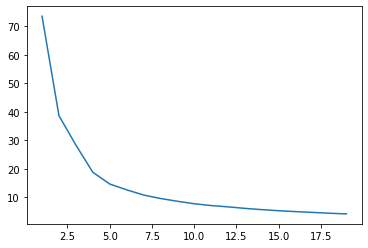

In [87]:
# Determining the number of clusters using elbow graph

sse = []

for k in range(1, 20):
    kmeans = cluster.KMeans(n_clusters = k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 20), sse)  # Elbow at k = 4
plt.show()

In [88]:
# Training the model for k = 4

kmeans = cluster.KMeans(n_clusters = 4)

y_predicted = kmeans.fit_predict(X)

print(y_predicted, len(y_predicted))

df['cluster'] = y_predicted
df.head()

[3 0 3 ... 1 3 3] 3849


,heartRate,glucose,cluster
0,0.363636,0.104520,3
1,0.515152,0.101695,0
2,0.313131,0.084746,3
3,0.212121,0.177966,1
4,0.414141,0.127119,3


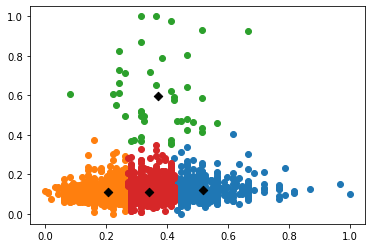

In [89]:
# Visualizing the clusters

df0 = df[df['cluster'] == 0]
df1 = df[df['cluster'] == 1]
df2 = df[df['cluster'] == 2]
df3 = df[df['cluster'] == 3]

centroids = kmeans.cluster_centers_

plt.scatter(df0['heartRate'], df0['glucose'])
plt.scatter(df1['heartRate'], df1['glucose'])
plt.scatter(df2['heartRate'], df2['glucose'])
plt.scatter(df3['heartRate'], df3['glucose'])
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'D', color = "black")

plt.show()